In [7]:
%matplotlib inline

In [8]:
import torch
import matplotlib.pyplot as plt

device = None
if torch.cuda.is_available():
    # device = torch.device('cuda')
    device = torch.device('cpu')
else:
    device = torch.device('cpu')


x_train = torch.tensor([[0.0], [1.0]], device=device).reshape(-1, 1)
y_train = torch.tensor([[1.0], [0.0]], device=device).reshape(-1, 1)

class NotOperatorModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], device=device, requires_grad=True)
        self.b = torch.tensor([[0.0]], device=device, requires_grad=True)

    def logits(self, x):
        return x @ self.W + self.b

    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x.to(device))).to(device)

    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [18]:
model = NotOperatorModel()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], 0.1)
for epoch in range(1_000_000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step

W = tensor([[-19.7341]], requires_grad=True), b = tensor([[9.6647]], requires_grad=True), loss = tensor(5.2927e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


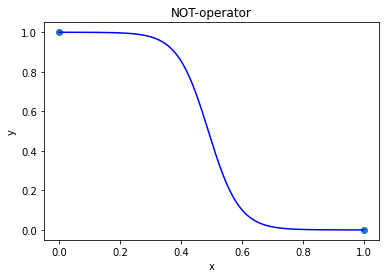

In [19]:
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

# Visualize result
plt.title('NOT-operator')
plt.scatter(x_train.cpu(), y_train.cpu())
plt.xlabel('x')
plt.ylabel('y')
x = torch.arange(0.0, 1.0, 0.001).reshape(-1, 1)
y = model.f(x).detach()
plt.plot(x.cpu(), y.cpu(), color="blue")
plt.show()